<a href="https://colab.research.google.com/github/rida-manzoor/ML/blob/main/Hierarical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hierarchical clustering**
  is a type of clustering algorithm that builds a hierarchy of clusters. Unlike k-means, hierarchical clustering does not require the number of clusters to be specified in advance. The algorithm starts with each data point as its own cluster and then successively merges or agglomerates clusters based on a measure of similarity until only one cluster remains.

There are two main types of hierarchical clustering:

1. **Agglomerative Hierarchical Clustering:**
   - This is the most common approach and begins with each data point as a single cluster. It then iteratively merges the closest pairs of clusters until a single cluster containing all the data points is formed.

   The steps in agglomerative hierarchical clustering are as follows:

   a. **Start with each data point as a single cluster.**
   ![alt](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning.png)
   
   b. **Find the two closest clusters and merge them.**
   ![alt](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning2.png)
   
   c. **Repeat step b until only one cluster remains.**
   ![alt](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning6.png)

   The result is a binary tree, known as a dendrogram, that represents the hierarchical structure of the clusters.

2. **Divisive Hierarchical Clustering:**
   - Divisive hierarchical clustering takes the opposite approach. It starts with all data points in a single cluster and then successively splits the cluster into smaller ones until each data point is in its own cluster.

   The steps in divisive hierarchical clustering are as follows:

   a. **Start with all data points in a single cluster.**
   
   b. **Find a cluster to split into two.**
   
   c. **Repeat step b until each data point is in its own cluster.**

   Divisive clustering also results in a dendrogram, but it represents a top-down view of the hierarchy.

**Linkage Methods:**
In hierarchical clustering, the choice of the linkage method, which determines how the distance between clusters is calculated, can impact the resulting clusters. Common linkage methods include:

1. **Single Linkage (or Minimum Linkage):**
   - The distance between two clusters is defined as the shortest distance between any two points in the two clusters.

   ![alt](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning7.png)

2. **Complete Linkage (or Maximum Linkage):**
   - The distance between two clusters is defined as the longest distance between any two points in the two clusters.

   ![alt](https://static.javatpoint.com/tutorial/machine-learning/images/hierarchical-clustering-in-machine-learning8.png)

3. **Average Linkage:**
   - The distance between two clusters is defined as the average distance between all pairs of points in the two clusters.

4. **Ward's Method:**
   - Minimizes the variance within each cluster. It tends to produce compact, spherical clusters.






**Dendrogram:**
A dendrogram is a tree diagram that displays the hierarchical relationship between clusters. Each merge or split is represented by a horizontal line, and the height of the line indicates the distance at which the merge or split occurred. The y-axis in a dendrogram represents the distance or dissimilarity between clusters.


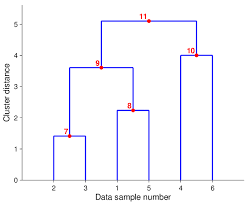


For defining threshold for number of clusters:
Select the longest vertical line such that no horizontal line passes through it.

**Advantages of Hierarchical Clustering:**
- No need to specify the number of clusters in advance.
- Provides a visual representation of cluster relationships through the dendrogram.

**Disadvantages of Hierarchical Clustering:**
- Computationally more intensive, especially for large datasets.
- Can be sensitive to noise and outliers.
- The result can depend on the choice of linkage method and distance metric.

Hierarchical clustering is a versatile method used in various fields, such as biology (taxonomy), social sciences, and data exploration. The choice between agglomerative and divisive clustering depends on the nature of the data and the desired clustering structure.

Here's a comparison between K-means and Hierarchical Clustering:

| Feature                   | K-Means                      | Hierarchical Clustering              |
|---------------------------|------------------------------|--------------------------------------|
| **Number of Clusters**    | User-specified (\(k\))        | Determined during or after clustering |
| **Cluster Structure**     | Non-overlapping, spherical   | Overlapping or nested clusters       |
| **Algorithmic Approach**  | Iterative (assign-update)    | Agglomerative or divisive            |
| **Sensitivity to Initial Conditions** | Sensitive             | Less sensitive                       |
| **Dendrogram**            | No                           | Yes (provides hierarchy)             |
| **Computational Complexity** | Efficient (linear time)    | Can be computationally intensive     |
| **Interpretability**      | Clear, non-overlapping       | May result in nested or overlapping  |
| **Use Cases**             | Well-defined structures     | Exploring hierarchical relationships |
| **Data Size** | Large | Small
| **Type of data** | Numerical data | Numerical and categorical

Note: The characteristics mentioned are generalizations, and the actual performance of each algorithm can depend on specific parameters, data characteristics, and the chosen implementation.

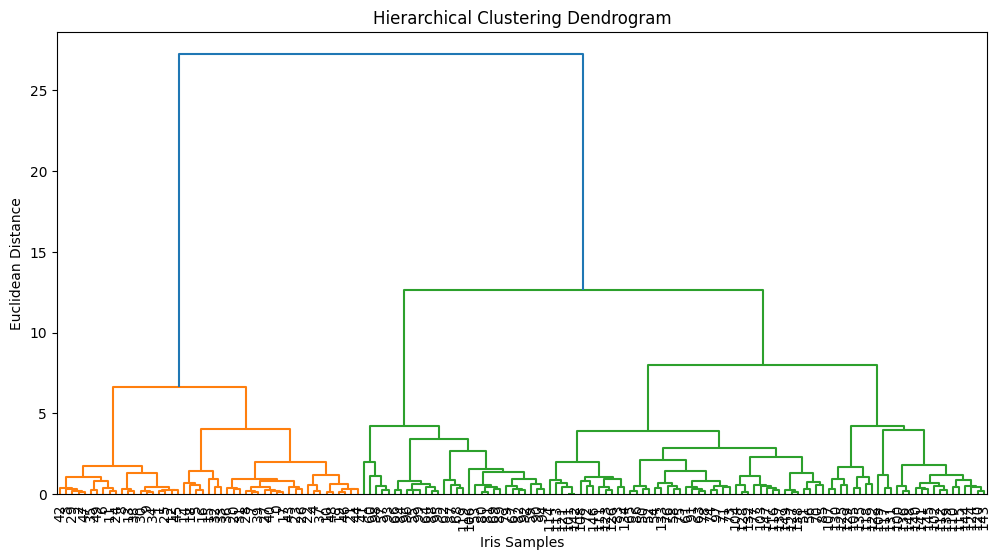

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering


iris = load_iris()
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])

features = iris_df.iloc[:, :-1]
scaled_features = StandardScaler().fit_transform(features)

scaled_features_df = pd.DataFrame(data=scaled_features, columns=iris['feature_names'])

linkage_matrix = linkage(scaled_features_df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=iris_df.index, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Iris Samples')
plt.ylabel('Euclidean Distance')
plt.show()
